Data downloaded from http://storage.googleapis.com/books/ngrams/books/datasetsv2.html

In [47]:
%%bash 
curl http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-1gram-20120701-1.gz | \
gunzip | grep '^19\d\d\t19\d\d' | gzip > year_year.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  269M  100  269M    0     0  1812k      0  0:02:32  0:02:32 --:--:-- 2058k


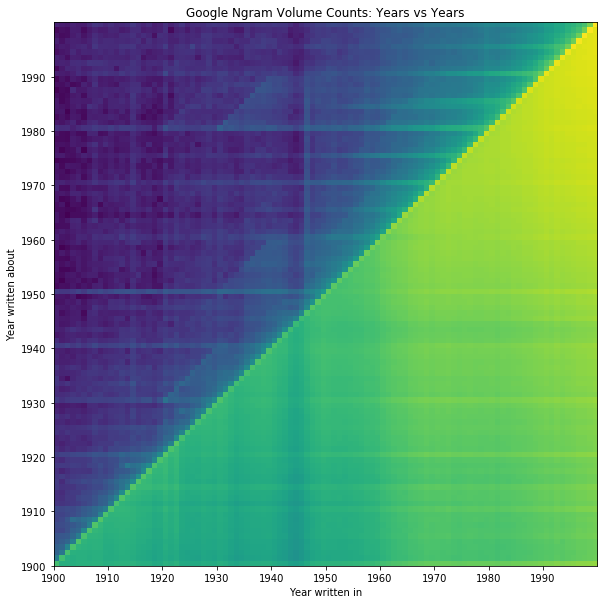

In [59]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("year_year.tsv.gz", delimiter='\t', names=['ngram', 'year', 'match_count', 'volume_count'])

matrix = df.pivot_table(index="year", columns='ngram', values='volume_count').T.values

f, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.log(matrix), extent=[1900, 2000, 1900, 2000], origin='lower')
ax.set_xticks(np.arange(1900, 2000, 10))
ax.set_yticks(np.arange(1900, 2000, 10))
ax.set_xlabel("Year written in")
ax.set_ylabel("Year written about")
ax.set_title("Google Ngram Volume Counts: Years vs Years")
plt.show()